<h1><center>Linear Regression with Pokemon Data</center></h1>

This notebook will be looking at applying a machine learning model on Pokemon data, the Pokemon data consists of the Pokemons name, type, generation and battle statistics. An exploration of the data will be done based on the finding of this regression mahcine learning model will be used to model the data and make a prediction on the battle statistic <b>Total</b>.

In [63]:
#Import Libraries
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline


<h2> Loading in the data</h2>

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
#Show the first five rows
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#Show descriptive statistics of the data
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
#Show the information summary on the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
#Shape of the data
df.shape

(800, 12)

In [9]:
#Show the number of null values in the data
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
#Columns in the data
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<h2>Feature Selection</h2>

We are gonna look at some features that we can explore more of data from, these are the battle attributes for each Pokemon.

In [11]:
#Select the features we want to look at
features = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [12]:
#Show the first five rows in the features data frame
features.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


Plotting each of these features using a histogram to show each features distribution. With each feature showing a very different shape

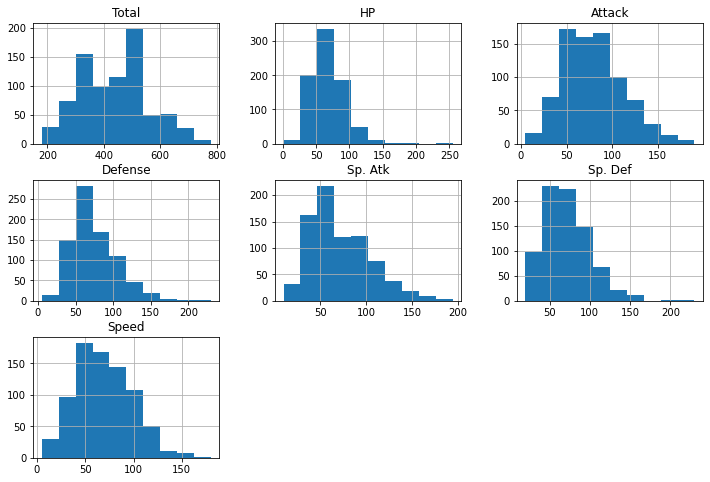

In [13]:
#Create histograms for each of the features in the feature
features.hist(figsize=(12,8))
plt.show()

In addition to histograms we will be looking at scatter plots and we will be plotting each of these features against the Total attribute to see how linear the the relationship is.

In [14]:
#Function to create a scatter plot for our features dataframe
def plotscatter(dataframe, x, y):
    
    colors=['royalblue', 'darkviolet', 'saddlebrown', 'midnightblue', 'lightcoral', 'red', 'darkgreen', 'purple', 
           'olive', 'teal']
    plt.scatter(dataframe[x], dataframe[y], color=random.choice(colors))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'The relationship between {x} and {y}')

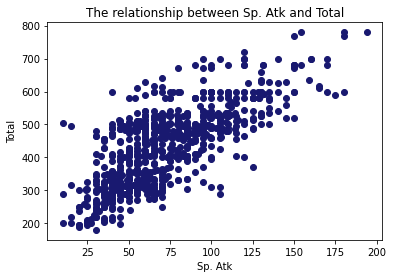

In [15]:
#Show the relationship between Total and Sp. Atk
plotscatter('Sp. Atk', 'Total')

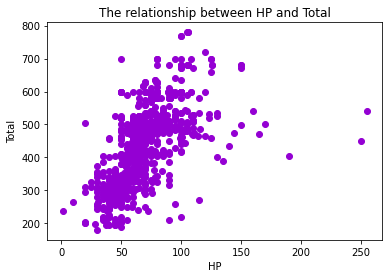

In [16]:
#Show the relationship between HP and Total
plotscatter('HP', 'Total')

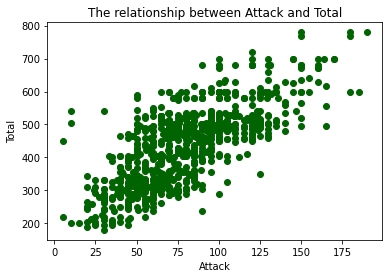

In [17]:
#Show the relationship between Attack and Total
plotscatter('Attack', 'Total')

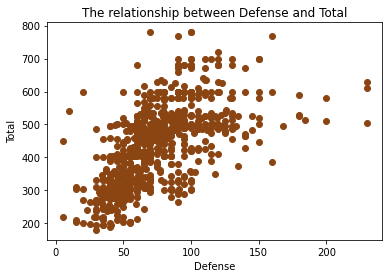

In [18]:
#Show the relationship between Defense and Total
plotscatter('Defense', 'Total')

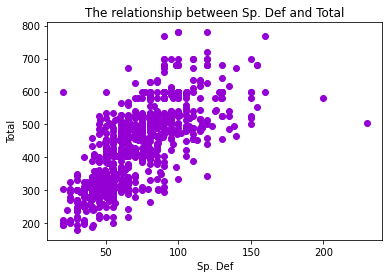

In [19]:
#Show the relationship between the Sp. Def and Total
plotscatter('Sp. Def', 'Total')

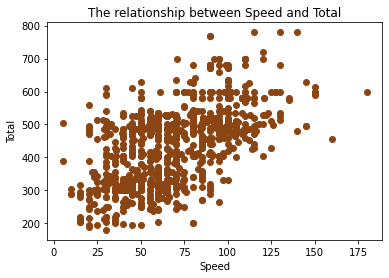

In [20]:
#Show the relationship between Speed and Total
plotscatter('Speed', 'Total')

<h2>Modelling</h2>

Firstly we will split the data into a training and testing set, this method creates a more accurate evaluation on out-of-sample accuracy.

In [28]:
#Create a train/test split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [31]:
#show first five rows of the test set
test.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
17,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
22,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
47,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False


In [32]:
#Show first five rows of the train set
train.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Show the Training Data Distribution, we will use the <b>Sp. Atk</b> attribute as a predictor for the <b>Total</b> variable as we can see from the above their is a linear relationship between them.

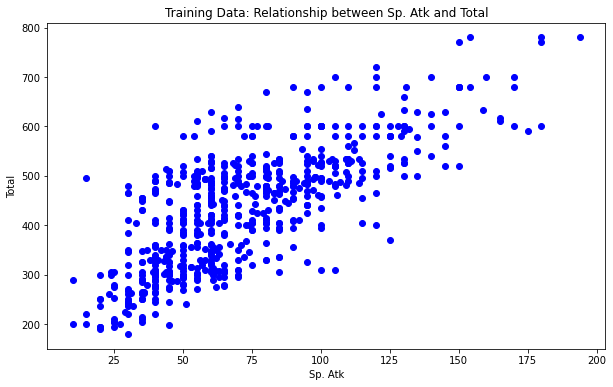

In [49]:
plt.figure(figsize=(10, 6))
plt.title("Training Data: Relationship between Sp. Atk and Total")
plt.scatter(train['Sp. Atk'], train['Total'], color="blue")
plt.xlabel('Sp. Atk')
plt.ylabel('Total')
plt.show()

Create the Linear Regression object and fit the model 

In [50]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Sp. Atk']])
train_y = np.asanyarray(train[['Total']])
regr.fit(train_x, train_y)

LinearRegression()

In [51]:
#Coefficients - These are our parameters
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[2.70003013]]
Intercept:  [240.01245033]


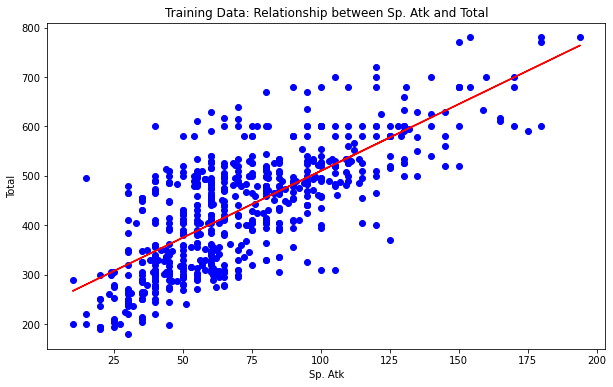

In [62]:
#This plots the fit line over the data
plt.figure(figsize=(10, 6))
plt.title("Training Data: Relationship between Sp. Atk and Total")
plt.scatter(train['Sp. Atk'], train['Total'], color="blue")
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], 'r')
plt.xlabel('Sp. Atk')
plt.ylabel('Total')
plt.show()

<h2>Evaluation</h2>

To evaluate the model we will be using the Mean absolute error, Mean Squared Error (MSE) and R-squared 

In [69]:
test_x = np.asanyarray(test[['Sp. Atk']])
test_y = np.asanyarray(test[['Total']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 63.54
Residual sum of squares (MSE): 6253.23
R2-score: 0.56
0.5647222156908678
